 
 # Heart Failure Prediction
 Exploración de dataset de datos cardiacos para clasificación de enfermedades cardiovasculares


Primero, se hará una breve descripción de las variables correspondientes a las columnas del data set. Son 13 columnas en total. El target de éste proyecto es la DEATH EVENT. Éste me indica si un paciente ha fallecido o no debido a un evento relacionado con su condición cardiovascular:

Valor 0: El paciente no ha fallecido (sigue vivo).
Valor 1: El paciente ha fallecido (evento de muerte relacionado).
El resto de las columnas (edad, anemia, serum sodium, etc.) son factores que podrían influir en la probabilidad de un "Death Event".

Ahora, este es un problema de clasificación, pero el objetivo es predecir si un paciente sufrirá un evento de muerte o no  basándose en las características del paciente, como edad, anemia, niveles de sodio en suero, etc.

El objetivo finalmente es utilizar varios algoritmos para construir un modelo que prediga la variable "Death Event" a partir de estas características.

Datos de las columnas

- Edad
Tipo de dato: Numérico
Rango: 40 a 95 años
Descripción: La edad del paciente en años. Es una característica continua que puede influir en la probabilidad de eventos cardiovasculares.

- Anemia:

Tipo de dato: Booleano (0 o 1)
Descripción: Indica si el paciente tiene anemia (1) o no (0). La anemia puede ser un factor de riesgo para enfermedades cardiovasculares.

- Creatinina:

Tipo de dato: Numérico
Rango: 23 a 7861 mcg/L
Descripción: Nivel de creatinina en la sangre. La creatinina es un producto de desecho de los músculos y su nivel en sangre puede indicar la función renal.

- Diabetes:

Tipo de dato: Booleano (0 o 1)
Descripción: Indica si el paciente tiene diabetes (1) o no (0). La diabetes es un factor de riesgo conocido para enfermedades cardiovasculares.

- Fracción de eyección:

Tipo de dato: Numérico (porcentaje)
Rango: 14% a 80%
Descripción: La fracción de eyección es una medida del porcentaje de sangre que el corazón expulsa con cada latido. Es un indicador de la función cardíaca.

- Presión arterial alta:

Tipo de dato: Booleano (0 o 1)
Descripción: Indica si el paciente tiene presión arterial alta (1) o no (0). La hipertensión es un factor de riesgo para enfermedades cardiovasculares.

- Plaquetas:

Tipo de dato: Numérico
Rango: 25.1k a 850k kiloplatelets/mL
Descripción: Número de plaquetas en la sangre. Las plaquetas son células sanguíneas que ayudan a la coagulación. Un número anormal puede indicar problemas en la coagulación o enfermedades subyacentes.

- Creatinina sérica:

Tipo de dato: Numérico
Rango: 0.5 a 9.4 mg/dL
Descripción: Nivel de creatinina en el suero sanguíneo. Al igual que el nivel de creatinina, su concentración puede reflejar la función renal.
 
- Sodio sérico:

Tipo de dato: Numérico
Rango: 113 a 148 mEq/L
Descripción: Nivel de sodio en el suero sanguíneo. El sodio es esencial para el equilibrio de fluidos y la función celular, y sus niveles pueden afectar la presión arterial y la función cardiovascular.

- Sexo:

Tipo de dato: Booleano (0 o 1)
Descripción: Indica el sexo del paciente. Los valores pueden ser 0 para masculino y 1 para femenino, o viceversa, dependiendo de la codificación en el dataset.

- Tiempo:

Tipo de dato: Numérico
Descripción: Período de seguimiento en días. Representa la duración durante la cual se monitoriza al paciente.

- Evento de muerte (Death Event):

Tipo de dato: Booleano (0 o 1)
Descripción: Indica si el paciente falleció durante el período de seguimiento (1) o no (0). Esta es la variable objetivo que se está tratando de predecir en el análisis.

# Codigo
Ahora, se realizará primero la carga de los archivos para posteriormente hacerle una exploración a estos, la exploración será de forma estadistica, se mostrará mediante graficas qué tipo de distribución tienen los datos, y se tomarán a analizar datos que tengan una distribución normal representativa o en caso de los booleanos, que presenten una diferencia significativa. La visualización de la distribución de los datos ayuda a identificar patrones, sesgos y anomalías, es más cómodo de analizar en términos estadisticos.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

In [5]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")#lee los datos
df.head()#muestra solo los primeros datos del df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Ahora, se realiza una grafica a las variables edad, y hihg blood pressure

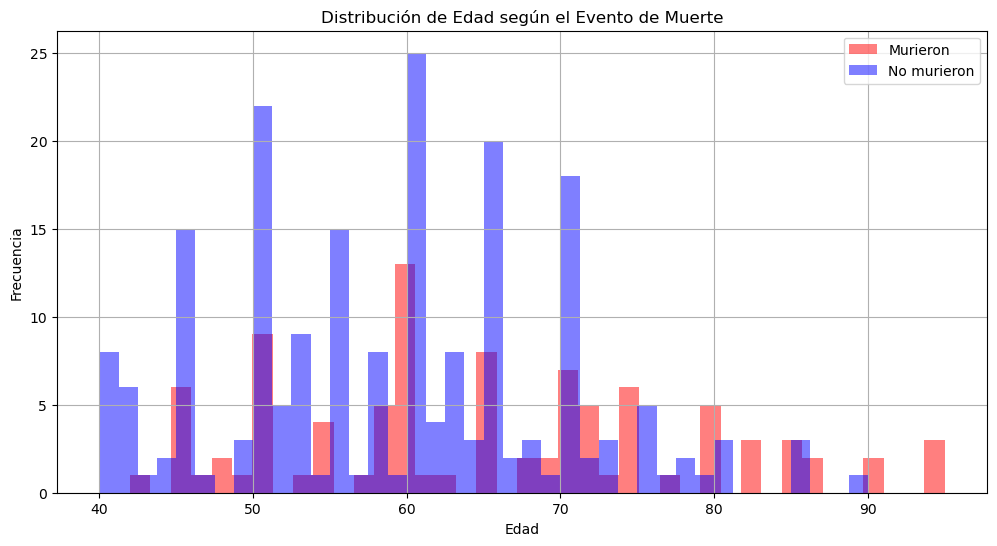

In [13]:
ages = df['age']
death_events = df['DEATH_EVENT']

plt.figure(figsize=(12, 6)) 

# Histograma para pacientes que murieron (death_event = 1)
plt.hist(ages[death_events == 1], bins=40, color='red', alpha=0.5, label='Murieron')

# Histograma para pacientes que no murieron (death_event = 0)
plt.hist(ages[death_events == 0], bins=40, color='blue', alpha=0.5, label='No murieron')

plt.title('Distribución de Edad según el Evento de Muerte')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()